In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#import figurefirst as fifi
import seaborn as sns
import numpy as np
import pandas as pd
import json
from statannotations.Annotator import Annotator #!pip install seaborn statannotations 
import pickle
from sklearn.metrics import r2_score

### Load data for the plots

In [3]:
alpha =  pd.read_csv('results_figures/alphafold_original_davis.csv')
esm = pd.read_csv('results_figures/esm_original_davis.csv')
rand = pd.read_csv('results_figures/rand_original_davis.csv')
rand_mol=pd.read_csv('results_figures/pconcs4_random_davis.csv')
pcons4 =pd.read_csv('results_figures/pconsc4_original_davis.csv')

In [24]:
train_mse=pd.read_csv('data_plots/MSE.csv')

In [4]:
#Pconsc4
P=pcons4 ['mean'] #predicted
Y=pcons4 ['exp'] #experimental
ers=pcons4 ['std'] #errors
#Random
P1=rand['mean']
Y1=rand['exp']
ers1=rand ['std']
#ESM
P2=rand['mean']
Y2=rand['exp']
ers2=rand['std']
#Alpha
P3=alpha['mean']
Y3=alpha['exp']
ers3=alpha['std']
#Pconsc4_Random_Mol_graph
P4=rand_mol['mean']
Y4=rand_mol['exp']
ers4=rand_mol['std']

In [9]:
np.unique(Y)

array([ 5.       ,  5.004365 ,  5.008774 ,  5.017729 ,  5.026872 ,
        5.031517 ,  5.036212 ,  5.0409584,  5.05061  ,  5.0604806,
        5.0655017,  5.070581 ,  5.075721 ,  5.091515 ,  5.09691  ,
        5.113509 ,  5.1191864,  5.124939 ,  5.1307683,  5.1366773,
        5.1426673,  5.1487417,  5.154902 ,  5.161151 ,  5.167491 ,
        5.1739254,  5.180456 ,  5.1870866,  5.19382  ,  5.2006593,
        5.207608 ,  5.21467  ,  5.229148 ,  5.236572 ,  5.2441254,
        5.251812 ,  5.2596374,  5.2676063,  5.275724 ,  5.2839966,
        5.29243  ,  5.30103  ,  5.309804 ,  5.318759 ,  5.3279023,
        5.337242 ,  5.3467875,  5.3565474,  5.3665314,  5.376751 ,
        5.387216 ,  5.39794  ,  5.4089355,  5.4202166,  5.4317985,
        5.4436975,  5.455932 ,  5.468521 ,  5.481486 ,  5.49485  ,
        5.5086384,  5.5228786,  5.537602 ,  5.552842 ,  5.5686364,
        5.5850267,  5.60206  ,  5.6197886,  5.6382723,  5.6575775,
        5.6777806,  5.69897  ,  5.7212462,  5.7447276,  5.7695

In [14]:
np.unique(P4)

array([4.9787955, 4.985739 , 4.9899426, ..., 7.9010186, 8.206353 ,
       8.415568 ])

In [5]:
# Randomly selected 50 data points from the test set
n =50
np.random.seed(22)
index = np.random.choice(len(Y), n, replace=False)  
#Pconsc4
x_random = Y[index] 
y_random = P[index] 
ers_random=ers[index]
#Random
x_random1 = Y1[index] 
y_random1 = P1[index] 
ers_random1=ers1[index]
#ESM
x_random2 = Y2[index] 
y_random2 = P2[index] 
ers_random2=ers2[index]
#Alpha
x_random3 = Y3[index] 
y_random3 = P3[index] 
ers_random3=ers3[index]
#Pconsc4_Random_Mol_graph
x_random4 = Y4[index] 
y_random4 = P4[index] 
ers_random4=ers4[index]

In [6]:
sns.set(font_scale = 11.5,style="white")

### Correlation plots- Protein encodings

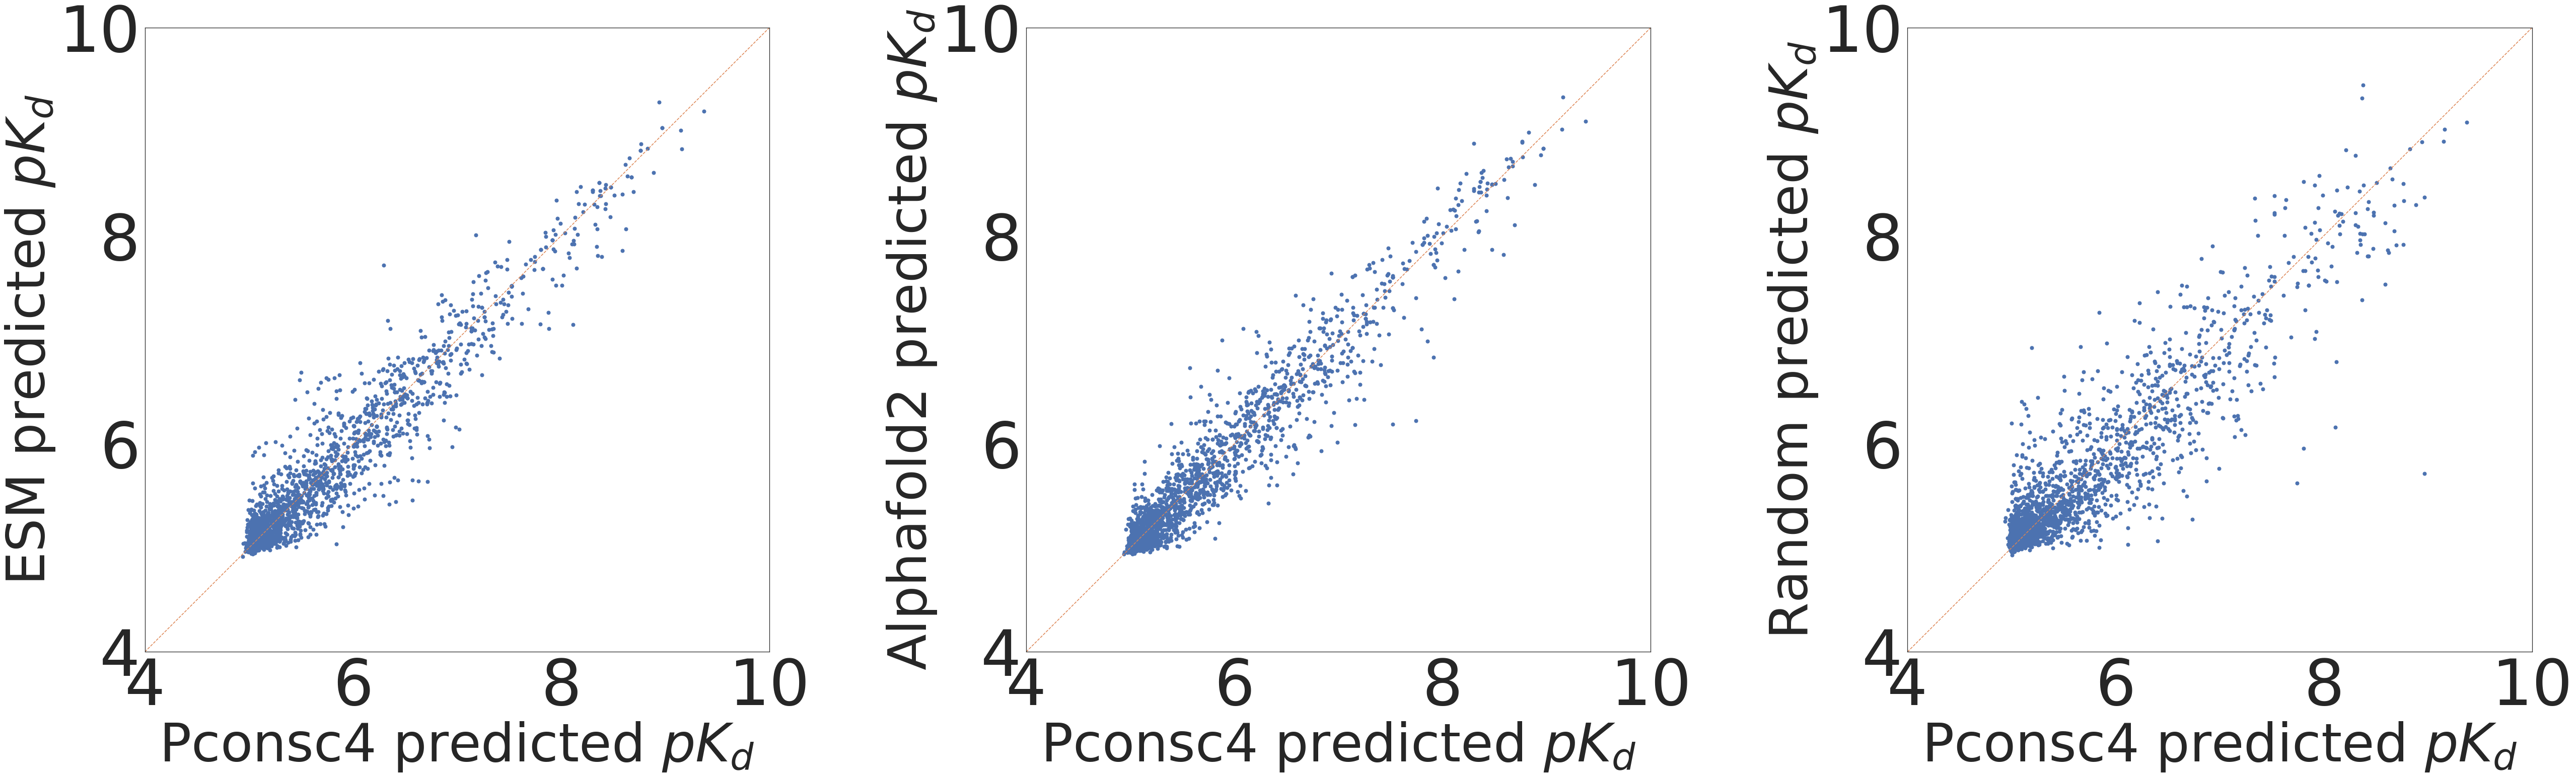

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(75,75), sharex=True)
x = np.linspace(4,10,5)

axes[0].set_aspect('equal', adjustable='box')
axes[0].plot(pcons4['mean'], esm['mean'],lw=0, marker ='o', ms=7) 
axes[0].plot(x,x,'--',ms=5)
axes[0].set_ylabel('ESM predicted $pK_d$',fontsize=105)
axes[0].set_xlabel('Pconsc4 predicted $pK_d$',fontsize=105)
axes[0].set_ylim([4,10])
axes[0].set_xlim([4,10])

axes[1].set_aspect('equal', adjustable='box')
axes[1].plot(pcons4['mean'], alpha['mean'],lw=0, marker ='o', ms=7) 
axes[1].plot(x,x,'--',ms=5)
axes[1].set_xlabel('Pconsc4 predicted $pK_d$',fontsize=105)
axes[1].set_ylabel('Alphafold2 predicted $pK_d$',fontsize=105)
axes[1].set_xlim([4,10])
axes[1].set_ylim([4,10])


axes[2].set_aspect('equal', adjustable='box')
axes[2].set_xlim([4,10])
axes[2].set_ylim([4,10])
axes[2].plot(pcons4['mean'], rand['mean'],lw=0, marker ='o', ms=7) 
axes[2].plot(x,x,'--',ms=5)
axes[2].set_xlabel('Pconsc4 predicted $pK_d$',fontsize=105)
axes[2].set_ylabel('Random predicted $pK_d$',fontsize=105)

fig.tight_layout()
fig.savefig(os.path.join('results_plots_davis',  'correlation_proteins' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'correlation_proteins' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'correlation_proteins' + '.svg'), dpi=500, bbox_inches='tight')

In [23]:
r2=r2_score(P3,P)
a=r2_score(df3['model1'],df['model1'])
b=r2_score(df3['model2'],df['model2'])
c=r2_score(df3['model3'],df['model3'])
print(r2,np.std([a,b,c]))

NameError: name 'df3' is not defined

### Predicted vs. Experimental for all the four protein encoding methods

In [16]:
sns.set(font_scale = 13,style="white")

In [25]:
fs=135
marker_size=12

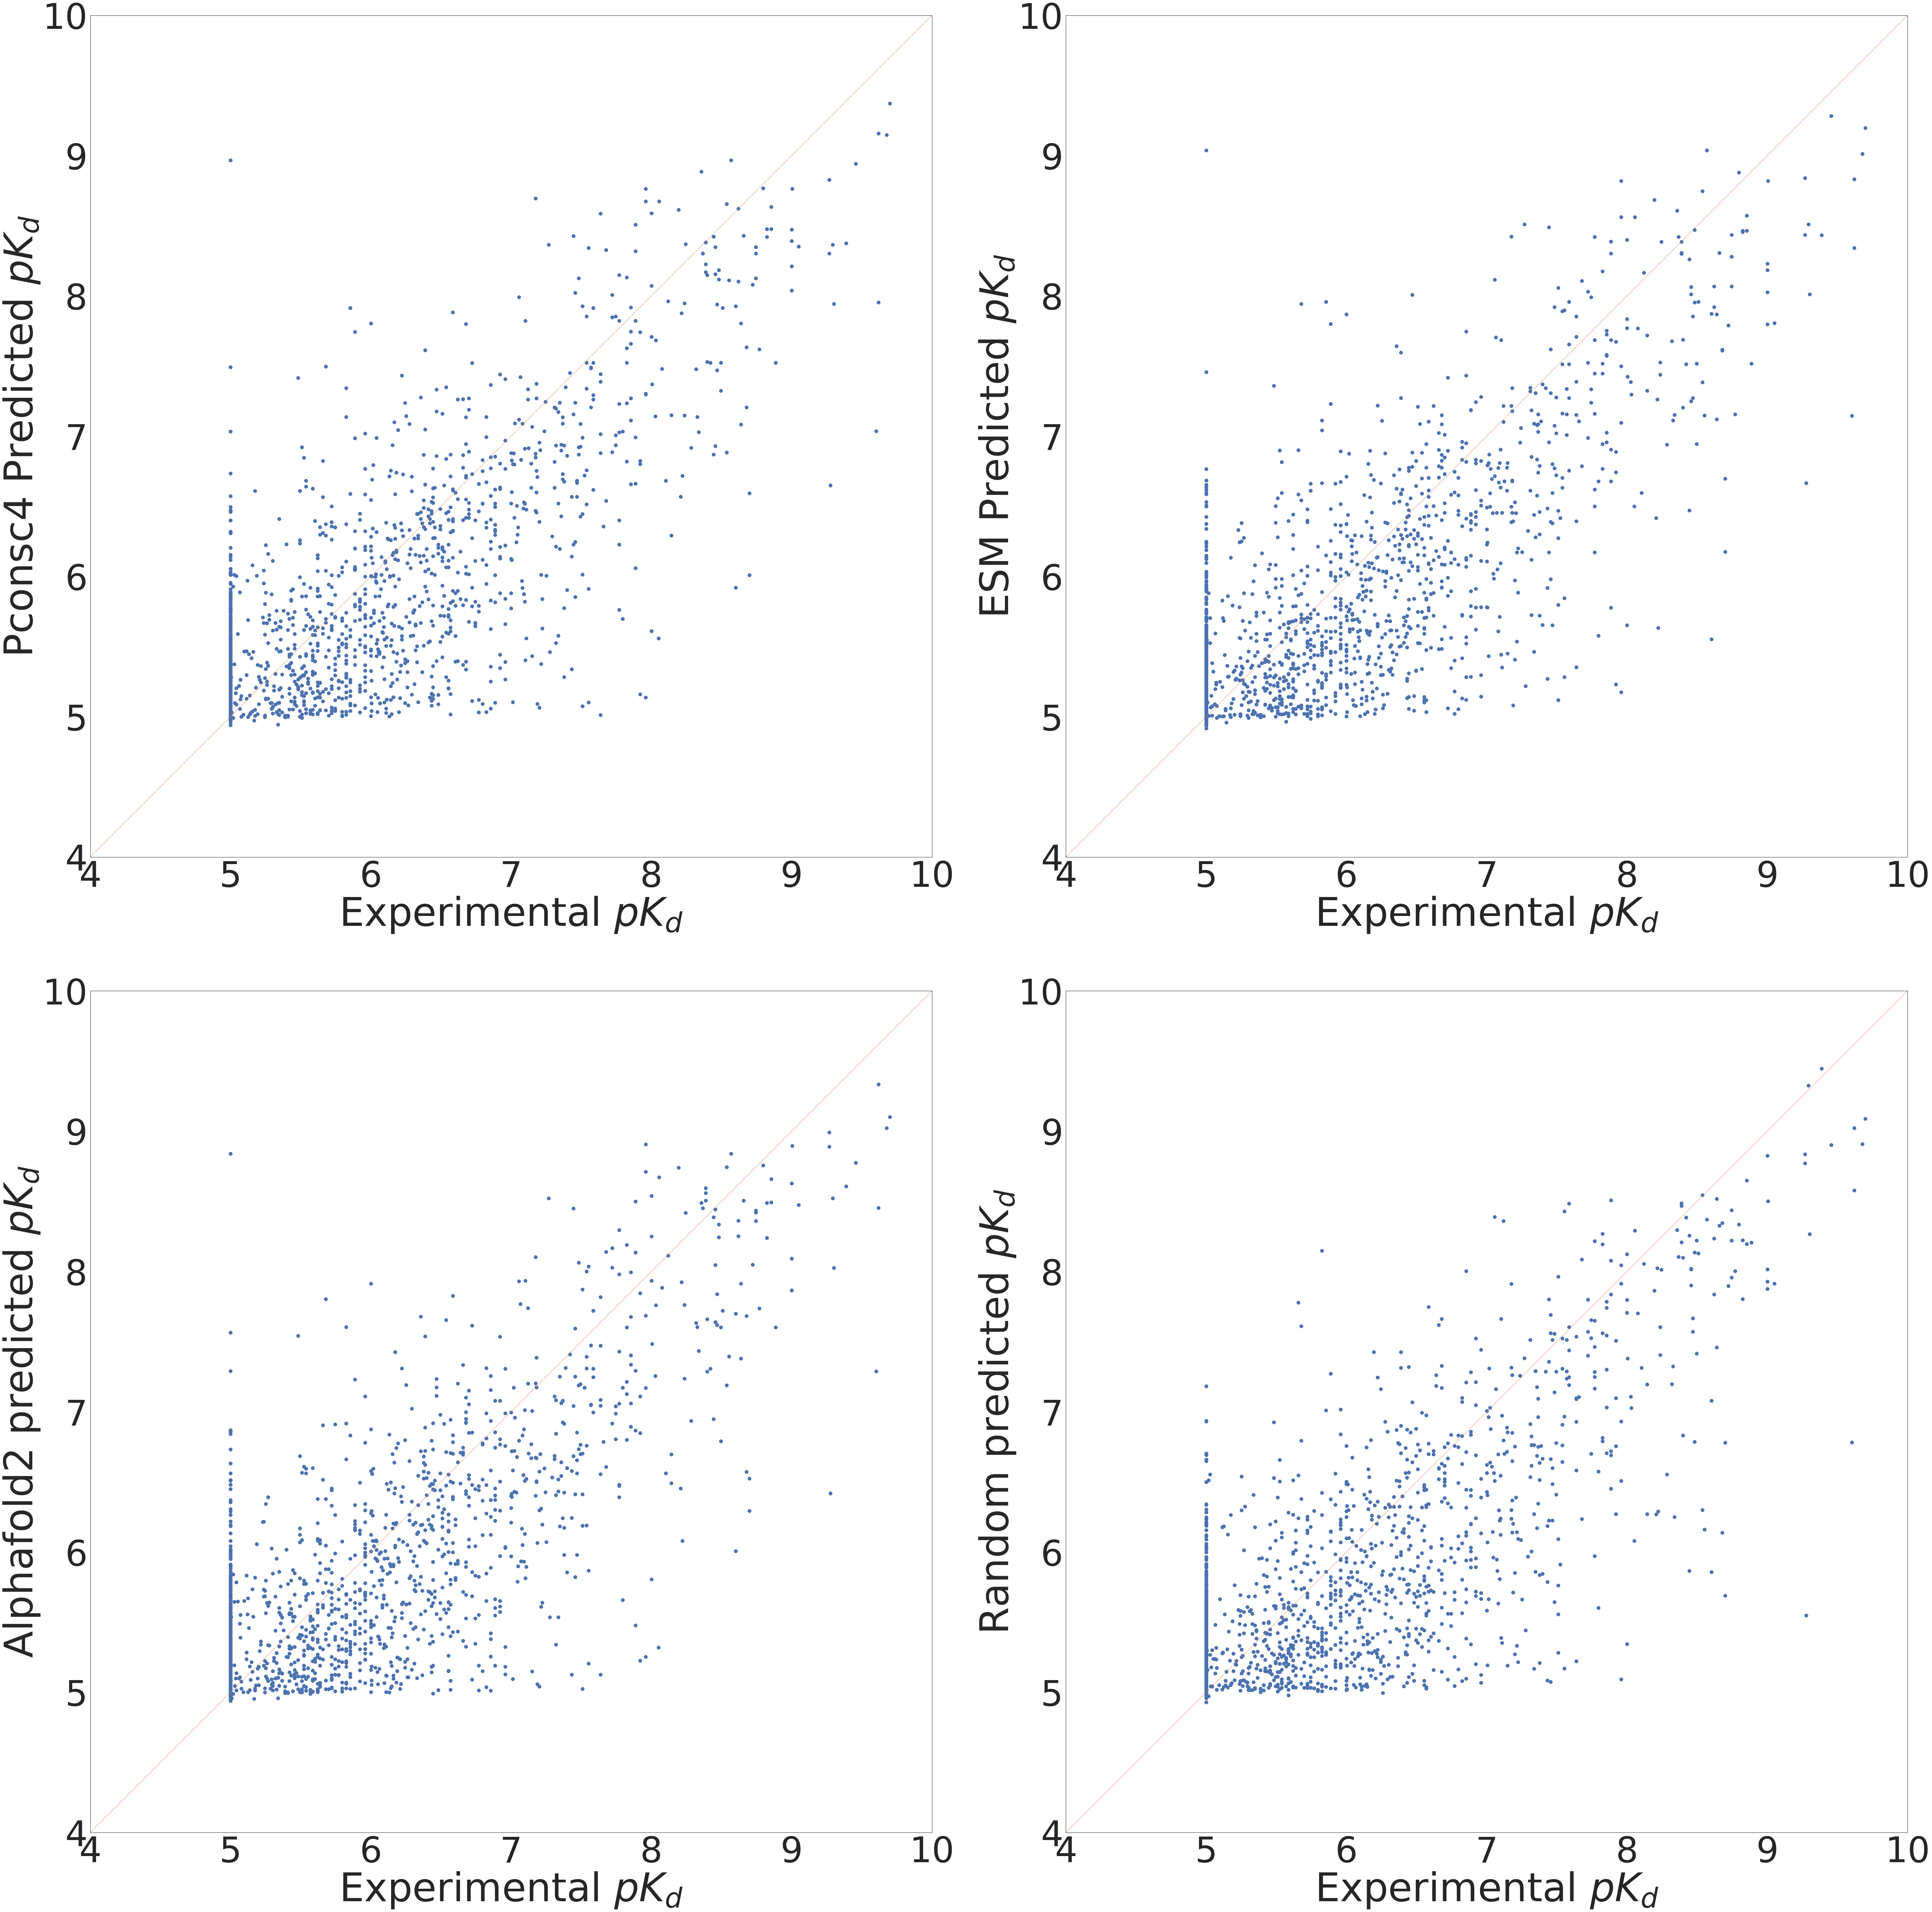

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(95,95))
x = np.linspace(4,10,5)

axes[0][0].set_aspect('equal', adjustable='box')
axes[0][0].plot(pcons4['exp'],pcons4['mean'],lw=0, marker ='o', ms=marker_size) 
axes[0][0].plot(x,x,'--',ms=marker_size)
axes[0][0].set_xlabel('Experimental $pK_d$',fontsize=fs)
axes[0][0].set_ylabel('Pconsc4 Predicted $pK_d$',fontsize=fs)
axes[0][0].set_ylim([4,10])
axes[0][0].set_xlim([4,10])

axes[0][1].set_aspect('equal', adjustable='box')
axes[0][1].plot(esm['exp'],esm['mean'],lw=0, marker ='o', ms=marker_size) 
axes[0][1].plot(x,x,'--',ms=marker_size)
axes[0][1].set_xlabel('Experimental $pK_d$',fontsize=fs)
axes[0][1].set_ylabel('ESM Predicted $pK_d$',fontsize=fs)
axes[0][1].set_xlim([4,10])
axes[0][1].set_ylim([4,10])


axes[1][0].set_aspect('equal', adjustable='box')
axes[1][0].plot(alpha['exp'],alpha['mean'],lw=0, marker ='o', ms=marker_size) 
axes[1][0].plot(x,x,'--',ms=marker_size)
axes[1][0].set_xlabel('Experimental $pK_d$',fontsize=fs)
axes[1][0].set_ylabel('Alphafold2 predicted $pK_d$',fontsize=fs)
axes[1][0].set_xlim([4,10])
axes[1][0].set_ylim([4,10])

axes[1][1].set_aspect('equal', adjustable='box')
axes[1][1].plot(rand['exp'],rand['mean'],lw=0, marker ='o', ms=marker_size) 
axes[1][1].plot(x,x,'--',ms=marker_size)
axes[1][1].set_xlabel('Experimental $pK_d$',fontsize=fs)
axes[1][1].set_ylabel('Random predicted $pK_d$',fontsize=fs)
axes[1][1].set_xlim([4,10])
axes[1][1].set_ylim([4,10])

fig.tight_layout()
fig.savefig(os.path.join('results_plots_davis',  'pred_vs_exp_proteins' + '.png'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'pred_vs_exp_proteins' + '.pdf'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'pred_vs_exp_proteins' + '.svg'), dpi=300, bbox_inches='tight')

### Error bars- Preicted vs. Experimetnal for ligand encodings on 50 test samples

In [29]:
sns.set(font_scale = 11,style="white")

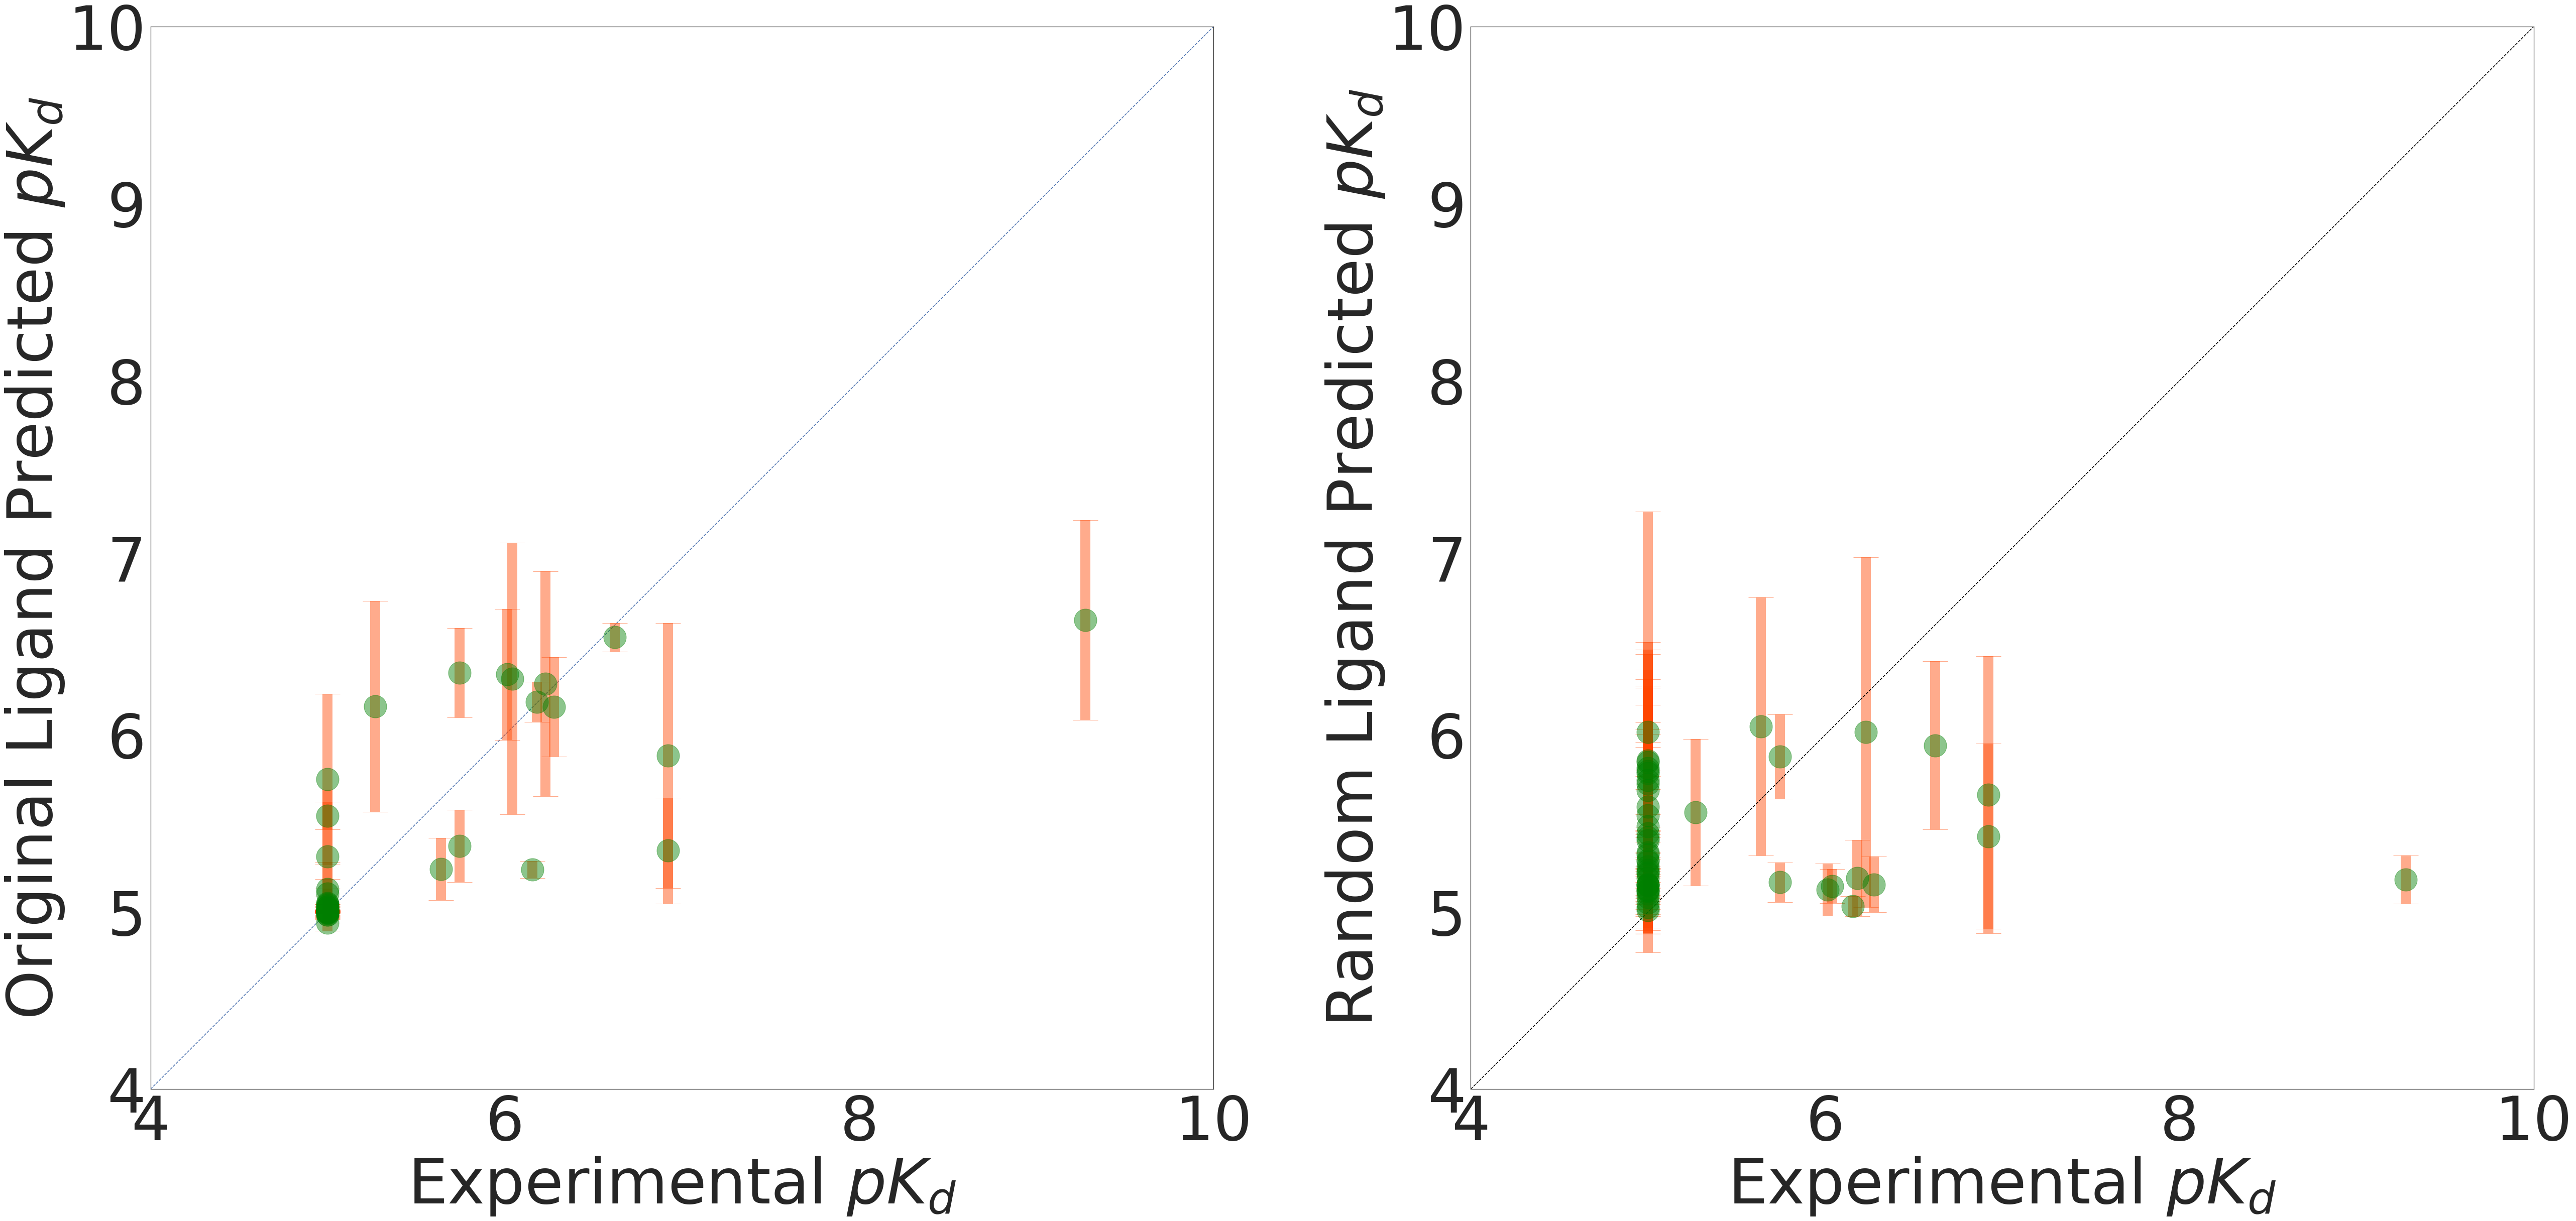

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(75,75), sharex=True)
x = np.linspace(4,10,5)

axes[0].set_aspect('equal', adjustable='box')
axes[0].plot(x,x,'--',ms=12)
axes[0].errorbar(x_random,y_random,  yerr=ers_random,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=45,elinewidth = 20, capsize=25,alpha=0.45,ls='none')
axes[0].set_ylabel('Original Ligand Predicted $pK_d$',fontsize=125)
axes[0].set_xlabel('Experimental $pK_d$',fontsize=125)
axes[0].set_ylim([4,10])
axes[0].set_xlim([4,10])

axes[1].set_aspect('equal', adjustable='box')
axes[1].errorbar(x_random4,y_random4,  yerr=ers_random4,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=45,elinewidth = 20, capsize=25,alpha=0.45,ls='none')
axes[1].plot(x,x,color='black',linestyle="--",ms=12)
axes[1].set_ylabel('Random Ligand Predicted $pK_d$',fontsize=125)
axes[1].set_xlabel('Experimental $pK_d$',fontsize=125)
axes[1].set_ylim([4,10])
axes[1].set_xlim([4,10])


fig.tight_layout()
fig.savefig(os.path.join('results_plots_davis',  'errorplot_ligands' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'errorplot_ligands' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots_davis',  'errorplot_ligands' + '.svg'), dpi=500, bbox_inches='tight')

In [21]:
r2=r2_score(Y4,P4)
a=r2_score(Y4,rand_mol['model1'])
b=r2_score(Y4,rand_mol['model2'])
c=r2_score(Y4,rand_mol['model3'])
print(r2,np.std([a,b,c]))

0.010727696870705739 0.045950625245189045


### Error bars for protein encoding methods-- change the method related variables

In [22]:
sns.set(font_scale = 5,style="white")

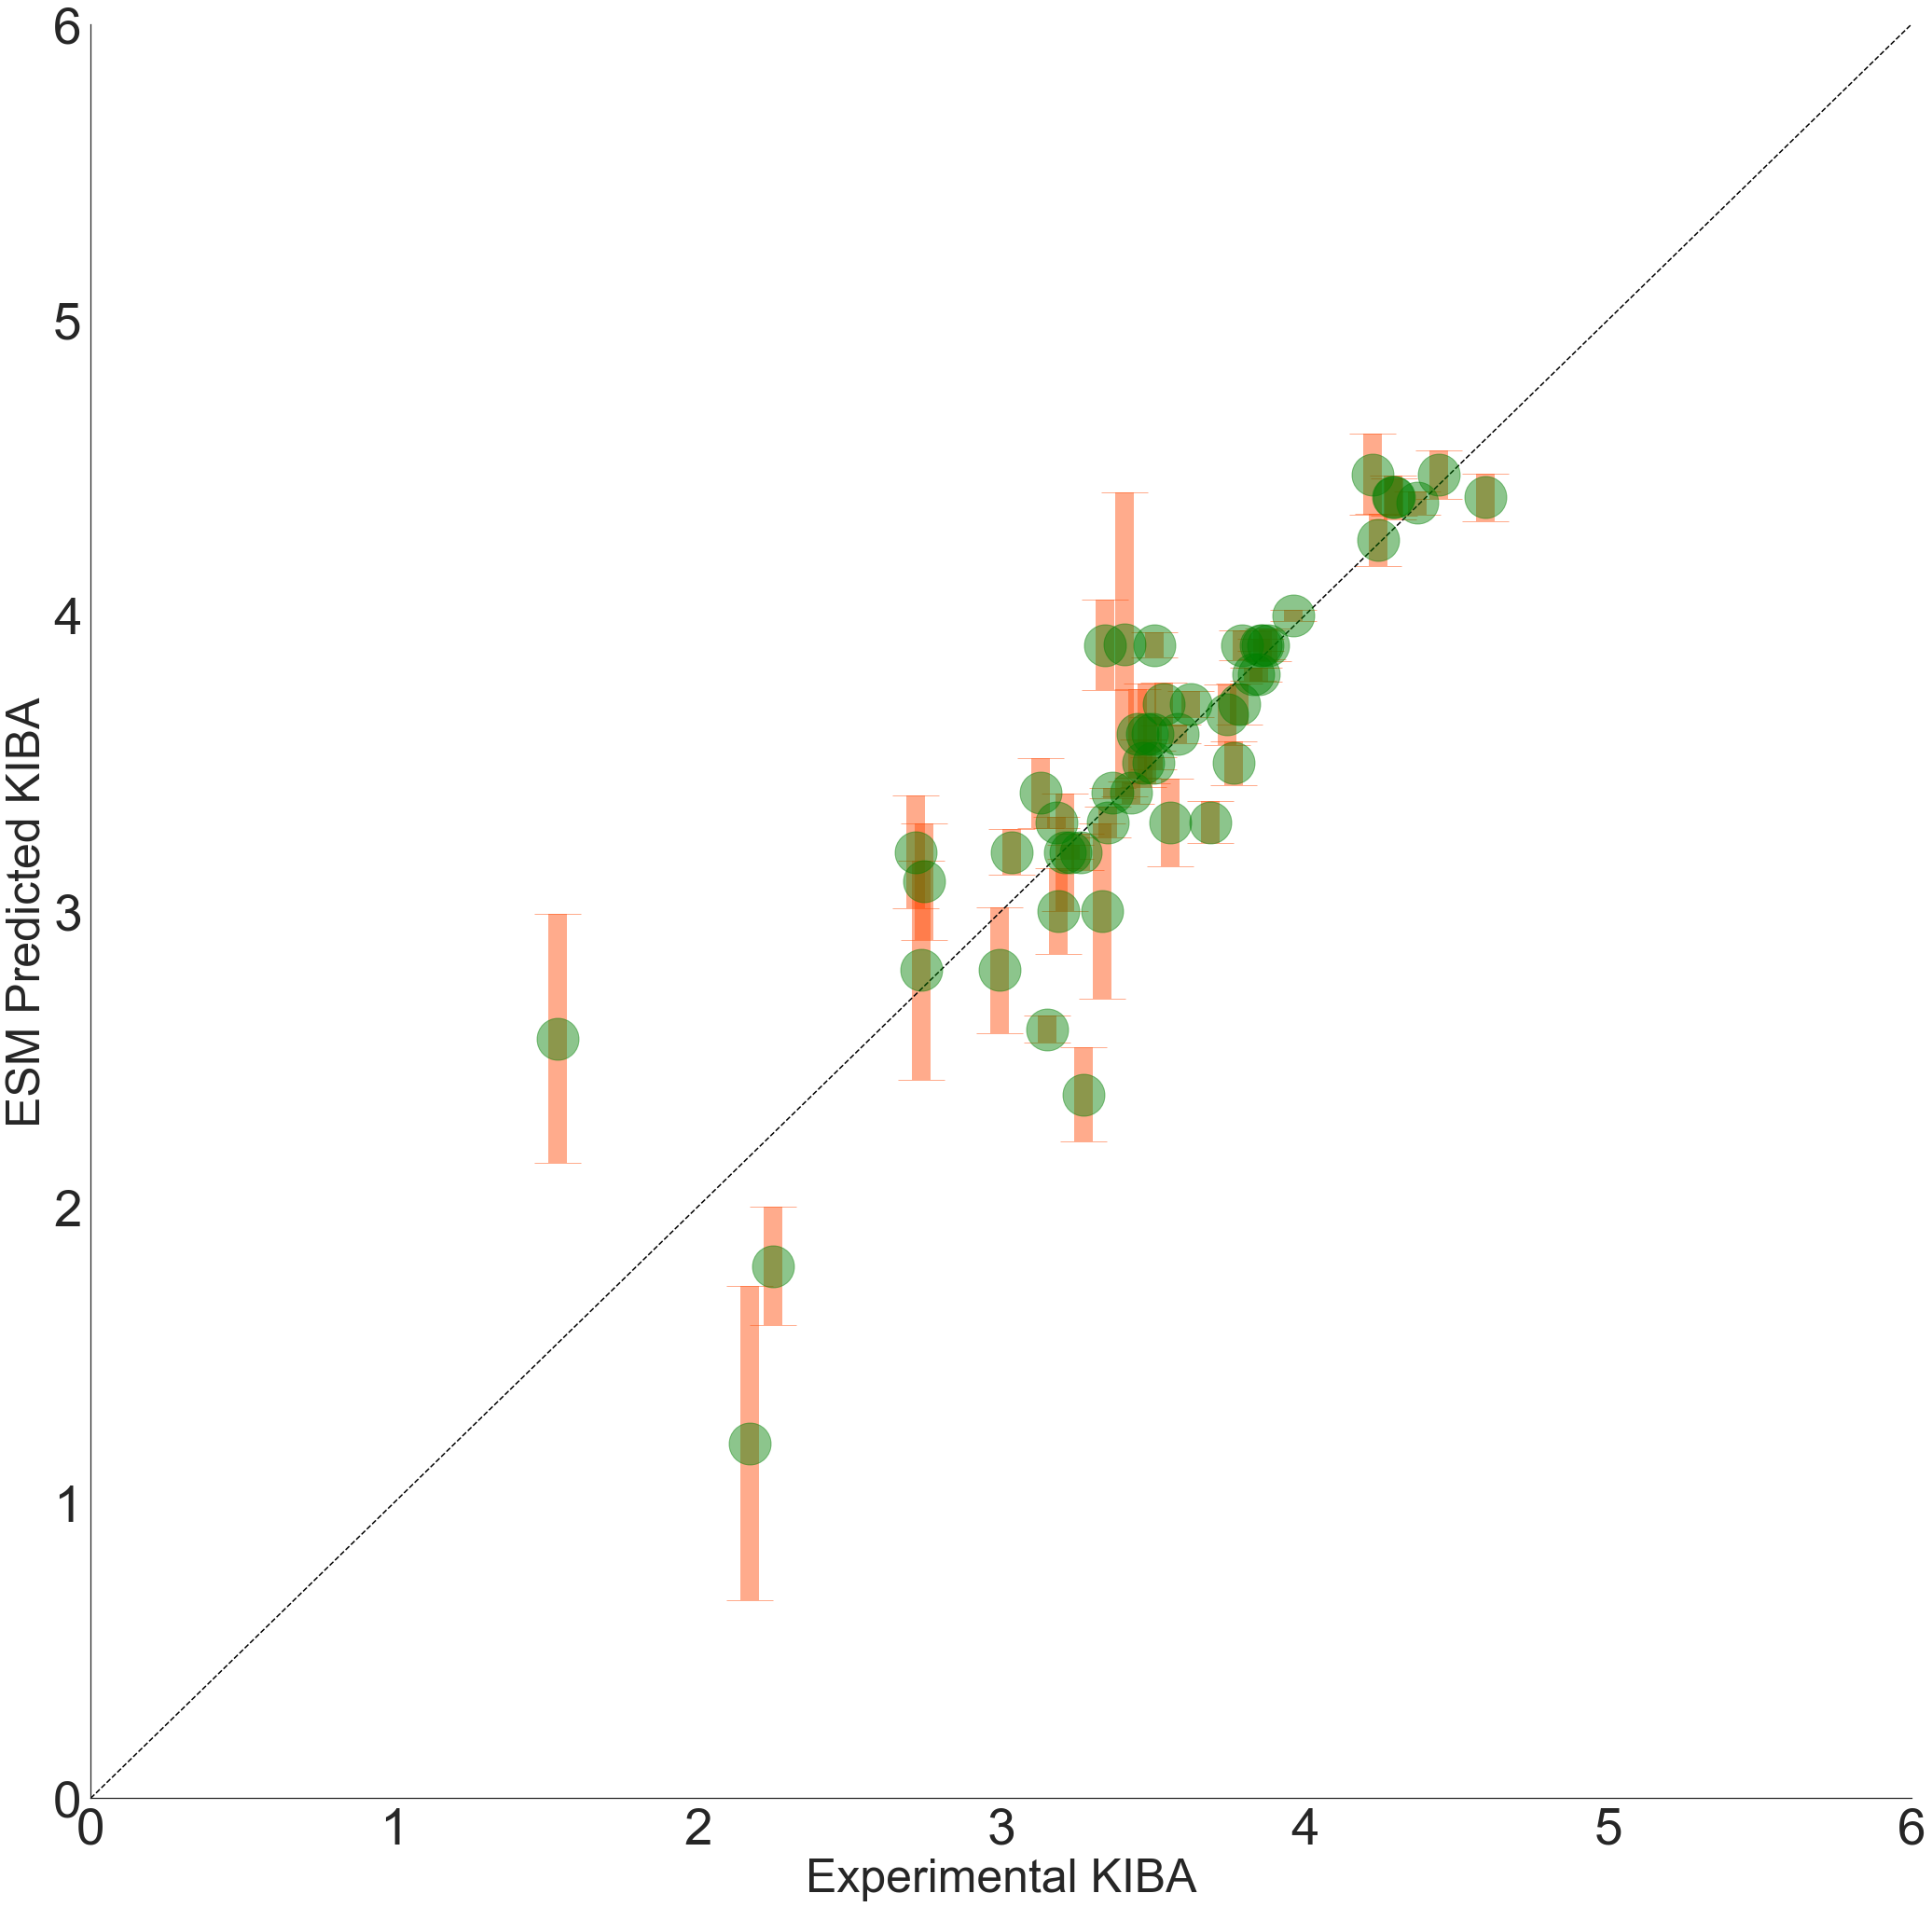

In [23]:
f, ax = plt.subplots(figsize=(35, 35))
#plt.grid(linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.errorbar(y_random2, x_random2, yerr=ers_random2,fmt = 'o',color = 'green', 
            ecolor = 'orangered', ms=45,elinewidth = 20, capsize=25,alpha=0.45)
plt.plot([0, 6], [0, 6], color='black',linestyle="--")
ax.set(ylim=(0, 6))
ax.set(xlim=(0,6))
ax.set_ylabel('ESM Predicted KIBA',fontsize=50)
ax.set_xlabel('Experimental KIBA',fontsize=50)
leg = plt.gca().get_legend()
 
plt.show()
f.savefig(os.path.join('results_plots',  'ESM vs Experimental' + '.png'), dpi=500, bbox_inches='tight')
f.savefig(os.path.join('results_plots',  'ESM vs Experimental' + '.pdf'), dpi=500, bbox_inches='tight')

### Training errors over 2000 epochs

In [ ]:
fig = plt.figure(figsize=(15, 15))


ax =  sns.lineplot(x = "Number of Epochs", y = "Mean Squared Error (MSE)",hue='Method',data =train_mse[::50],palette='Set2',style="Method",
            markers = ["o", "v", "s", ">","d"],estimator=None, lw=4,ms=7)

ax.set_xlabel('Number of Epochs',fontsize=30)
ax.set_ylabel('Mean Squared Error (MSE)',fontsize=30)
plt.legend(loc='upper right',fontsize=26)

fig.savefig(os.path.join('results6',  'training_errors' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results6',  'training_errors' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results6',  'training_errors' + '.svg'), dpi=500, bbox_inches='tight')
